# Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading The Data

In [2]:
heart=pd.read_csv(r"C:\Users\hp\Desktop\Data_Analytics\heart.csv")

# Shape of Data

In [3]:
heart.shape

(319795, 18)

In [4]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# We have to find that person have Heart Disease or Not. So our target column is Heart Disease.

In [5]:
heart.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Check information of Dataset

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


# Missing Value Treatement

In [8]:
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Data Types Conversion 

In [9]:
heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

# Conversion of Categorical To Numerical

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
heart.HeartDisease=le.fit_transform(heart.HeartDisease)

In [12]:
heart.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [13]:
heart.Smoking=le.fit_transform(heart.Smoking)

In [14]:
heart.Smoking.value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

In [15]:
heart.AlcoholDrinking=le.fit_transform(heart.AlcoholDrinking)

In [16]:
heart.AlcoholDrinking.value_counts()

0    298018
1     21777
Name: AlcoholDrinking, dtype: int64

In [17]:
heart.Stroke=le.fit_transform(heart.Stroke)

In [18]:
heart.Stroke.value_counts()

0    307726
1     12069
Name: Stroke, dtype: int64

In [19]:
heart.DiffWalking=le.fit_transform(heart.DiffWalking)

In [20]:
heart.DiffWalking.value_counts()

0    275385
1     44410
Name: DiffWalking, dtype: int64

In [21]:
heart.Sex=le.fit_transform(heart.Sex)

In [22]:
heart.Sex.value_counts()

0    167805
1    151990
Name: Sex, dtype: int64

In [23]:
heart.AgeCategory=le.fit_transform(heart.AgeCategory)

In [24]:
heart.AgeCategory.value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

In [25]:
heart.Race=le.fit_transform(heart.Race)

In [26]:
heart.Race.value_counts()

5    245212
3     27446
2     22939
4     10928
1      8068
0      5202
Name: Race, dtype: int64

In [27]:
heart.Diabetic=le.fit_transform(heart.Diabetic)

In [28]:
heart.Diabetic.value_counts()

0    269653
2     40802
1      6781
3      2559
Name: Diabetic, dtype: int64

In [29]:
heart.PhysicalActivity=le.fit_transform(heart.PhysicalActivity)

In [30]:
heart.PhysicalActivity.value_counts()

1    247957
0     71838
Name: PhysicalActivity, dtype: int64

In [31]:
heart.GenHealth=le.fit_transform(heart.GenHealth)

In [32]:
heart.GenHealth.value_counts()

4    113858
2     93129
0     66842
1     34677
3     11289
Name: GenHealth, dtype: int64

In [33]:
heart.Asthma=le.fit_transform(heart.Asthma)

In [34]:
heart.Asthma.value_counts()

0    276923
1     42872
Name: Asthma, dtype: int64

In [35]:
heart.KidneyDisease=le.fit_transform(heart.KidneyDisease)

In [36]:
heart.KidneyDisease.value_counts()

0    308016
1     11779
Name: KidneyDisease, dtype: int64

In [37]:
heart.SkinCancer=le.fit_transform(heart.SkinCancer)

In [38]:
heart.SkinCancer.value_counts()

0    289976
1     29819
Name: SkinCancer, dtype: int64

In [39]:
heart.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [40]:
a=heart.corr()
a

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


# Correlation

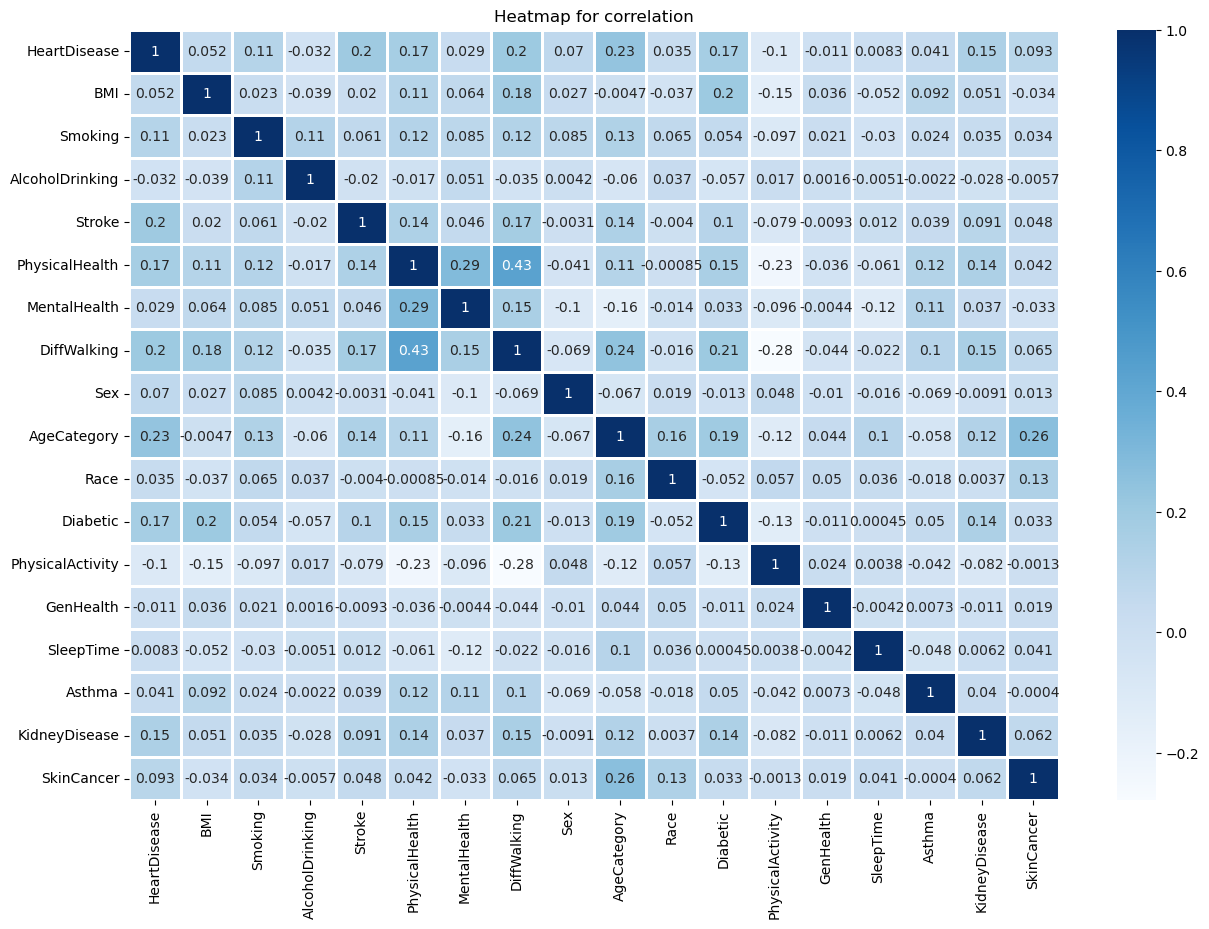

In [41]:
plt.figure(figsize=(15,10))
Heatmap=sns.heatmap(a,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap for correlation")
plt.show()

# Data Visualization

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

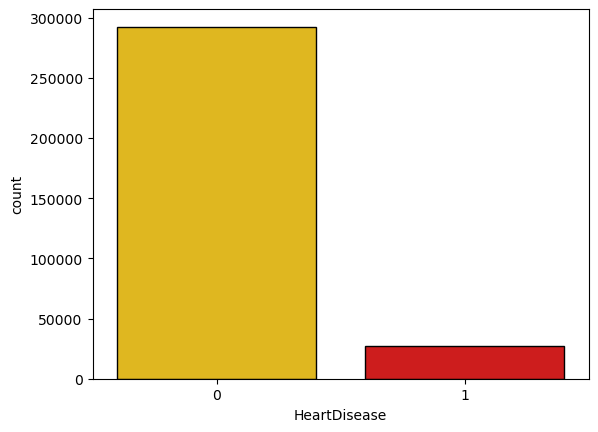

In [42]:
sns.countplot("HeartDisease",data=heart,palette="hot_r",edgecolor="black")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

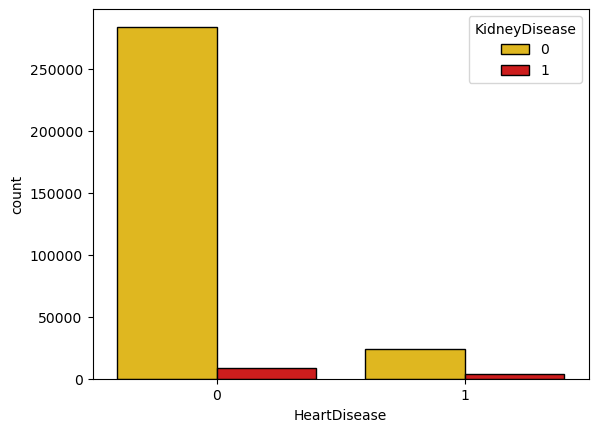

In [43]:
sns.countplot(heart.HeartDisease,hue=heart.KidneyDisease,palette="hot_r",edgecolor="black")

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

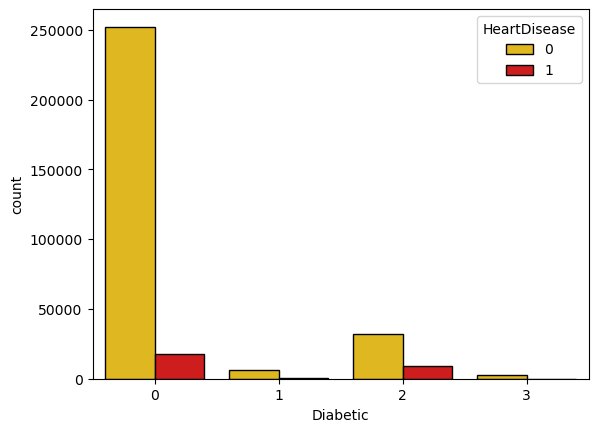

In [44]:
sns.countplot(heart.Diabetic,hue=heart.HeartDisease,palette="hot_r",edgecolor="black")

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

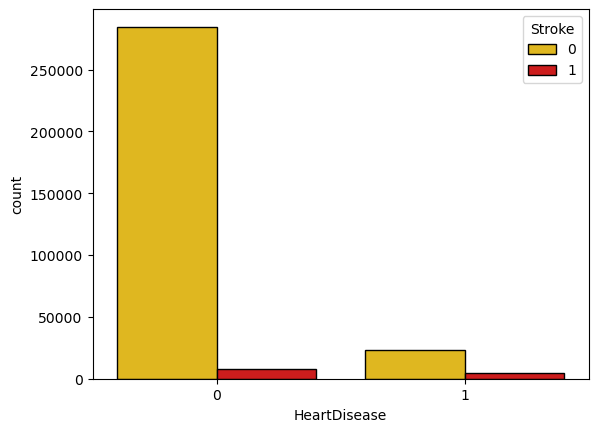

In [45]:
sns.countplot(heart.HeartDisease,hue=heart.Stroke,palette="hot_r",edgecolor="black")

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

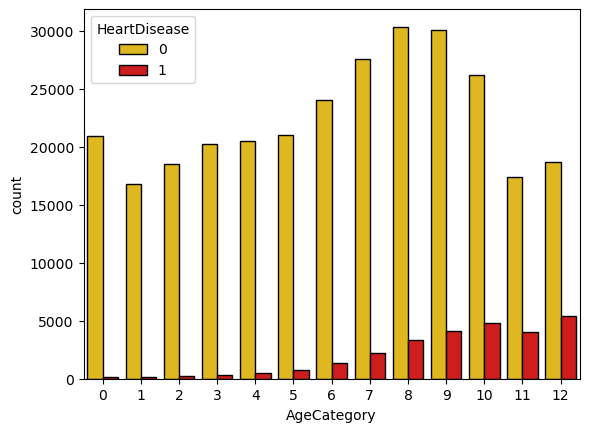

In [46]:
#plt.figure(figsize=(16,9))
sns.countplot(heart.AgeCategory,hue=heart.HeartDisease,palette="hot_r",edgecolor="black")

# Model Building without treating outliers

# Split Data

In [47]:
X=heart.drop(["HeartDisease"],axis=1)
Y=heart["HeartDisease"]
X.shape,Y.shape

((319795, 17), (319795,))

# Train Test Split


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((255836, 17), (63959, 17), (255836,), (63959,))

# 1.Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [50]:
lg.fit(X_train,Y_train)

LogisticRegression()

In [51]:
lg_pred=lg.predict(X_test)
lg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
lg_cf=confusion_matrix(Y_test,lg_pred)
lg_cf

array([[57948,   438],
       [ 5075,   498]], dtype=int64)

In [53]:
lg_acc=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc

91.38041557873012

In [54]:
print(classification_report(Y_test,lg_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58386
           1       0.53      0.09      0.15      5573

    accuracy                           0.91     63959
   macro avg       0.73      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959



# 2.Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
dt_pred=dt.predict(X_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
dt_cf=confusion_matrix(Y_test,dt_pred)
dt_cf

array([[53764,  4622],
       [ 4130,  1443]], dtype=int64)

In [58]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

86.31623383730202

In [59]:
print(classification_report(Y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     58386
           1       0.24      0.26      0.25      5573

    accuracy                           0.86     63959
   macro avg       0.58      0.59      0.59     63959
weighted avg       0.87      0.86      0.87     63959



# 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [61]:
rf_pred=rf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
rf_cf=confusion_matrix(Y_test,rf_pred)
rf_cf

array([[57255,  1131],
       [ 4914,   659]], dtype=int64)

In [63]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

90.54863271783486

In [64]:
print(classification_report(Y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58386
           1       0.37      0.12      0.18      5573

    accuracy                           0.91     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.91      0.88     63959



In [65]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

90.54863271783486

# 4. Naive Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [67]:
nb_pred=nb.predict(X_test)
nb_pred

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
nb_c=confusion_matrix(Y_test,nb_pred)
nb_c

array([[51804,  6582],
       [ 3748,  1825]], dtype=int64)

In [69]:
nb_acc=nb_c.diagonal().sum()/nb_c.sum()*100
nb_acc

83.84902828374427

In [70]:
print(classification_report(Y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     58386
           1       0.22      0.33      0.26      5573

    accuracy                           0.84     63959
   macro avg       0.57      0.61      0.59     63959
weighted avg       0.87      0.84      0.85     63959



# 5.SVM

In [71]:
from sklearn.svm import SVC

In [72]:
svms=SVC()

In [73]:
svms.fit(X_train,Y_train)

SVC()

In [74]:
svms_pred=svms.predict(X_test)

In [75]:
svms_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
svms_c=confusion_matrix(Y_test,svms_pred)  

In [77]:
svms_acc=svms_c.diagonal().sum()/svms_c.sum()*100
svms_acc

91.28660548163667

In [78]:
print(classification_report(Y_test,svms_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58386
           1       0.00      0.00      0.00      5573

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959



# 6.KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [80]:
knn_pred=knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
knn_c=confusion_matrix(Y_test,knn_pred)

In [82]:
knn_acc=knn_c.diagonal().sum()/knn_c.sum()*100
knn_acc

90.60022827123626

In [83]:
print(classification_report(Y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58386
           1       0.35      0.09      0.14      5573

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.55     63959
weighted avg       0.87      0.91      0.88     63959



# 7.Boosting

# 7.1 Ada Boost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)
ada.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [85]:
ada_pred=ada.predict(X_test)
ada_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
ada_c=confusion_matrix(Y_test,ada_pred)

In [87]:
ada_acc=ada_c.diagonal().sum()/ada_c.sum()*100
ada_acc

88.83190794102472

In [88]:
print(classification_report(Y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     58386
           1       0.26      0.15      0.19      5573

    accuracy                           0.89     63959
   macro avg       0.59      0.56      0.57     63959
weighted avg       0.86      0.89      0.87     63959



# 7.2 XG Boost

In [89]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [90]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [91]:
xgb_pred=xgb.predict(X_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
xgb_c=confusion_matrix(Y_test,xgb_pred)

In [93]:
xgb_acc=xgb_c.diagonal().sum()/xgb_c.sum()*100
xgb_acc

91.44608264669554

In [94]:
print(classification_report(Y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58386
           1       0.55      0.09      0.16      5573

    accuracy                           0.91     63959
   macro avg       0.74      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959



# Conclusion

In [95]:
#l1=["Logistic Regression","Decision Tree","Random Forest","Naive Bayes","SVM","KNN","Ada Boost","XG Boost"]
#l2=[lg_acc,dt_acc,rf_acc,nb_acc,svms_acc,knn_acc,ada_acc,xgb_acc]

# If we concider accuracy then "XG Boost" is the best fitted Model. The classification report is not good at all so we consider Naive Bayse as a Best Fitted Model 

In [96]:
#df1=pd.DataFrame({"Model Name":l1,"Accuracy":l2})
#df1

# Class Imbalance Treatment

In [97]:
c_0,c_1=heart['HeartDisease'].value_counts()
c_0,c_1

(292422, 27373)

In [98]:
train_0=heart[heart['HeartDisease']==0]
train_1=heart[heart['HeartDisease']==1]

In [99]:
train_0.shape,train_1.shape

((292422, 18), (27373, 18))

In [100]:
class0_under=train_0.sample(c_1)

In [101]:
heart_class=pd.concat([class0_under, train_1], axis=0)
heart_class

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
213476,0,32.91,1,0,0,0.0,0.0,0,1,6,5,0,1,2,6.0,0,0,0
113939,0,22.15,0,0,0,0.0,0.0,0,1,12,5,0,1,2,8.0,0,0,1
38613,0,47.47,0,0,0,7.0,0.0,0,1,1,5,0,0,2,8.0,0,0,0
199622,0,29.12,0,0,0,0.0,0.0,0,0,5,5,0,1,4,6.0,0,0,0
267480,0,23.30,0,0,0,0.0,0.0,0,0,0,3,0,0,2,7.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319765,1,38.45,0,0,1,30.0,15.0,1,0,7,3,2,1,3,6.0,1,0,0
319767,1,36.21,1,0,0,0.0,0.0,1,0,11,3,2,1,2,8.0,0,0,0
319781,1,37.12,1,0,0,0.0,0.0,0,1,3,3,0,1,4,7.0,0,0,0
319786,1,33.20,1,0,0,0.0,0.0,0,0,8,3,2,1,4,8.0,1,0,0


In [102]:
heart_class.HeartDisease.value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

# EDA 

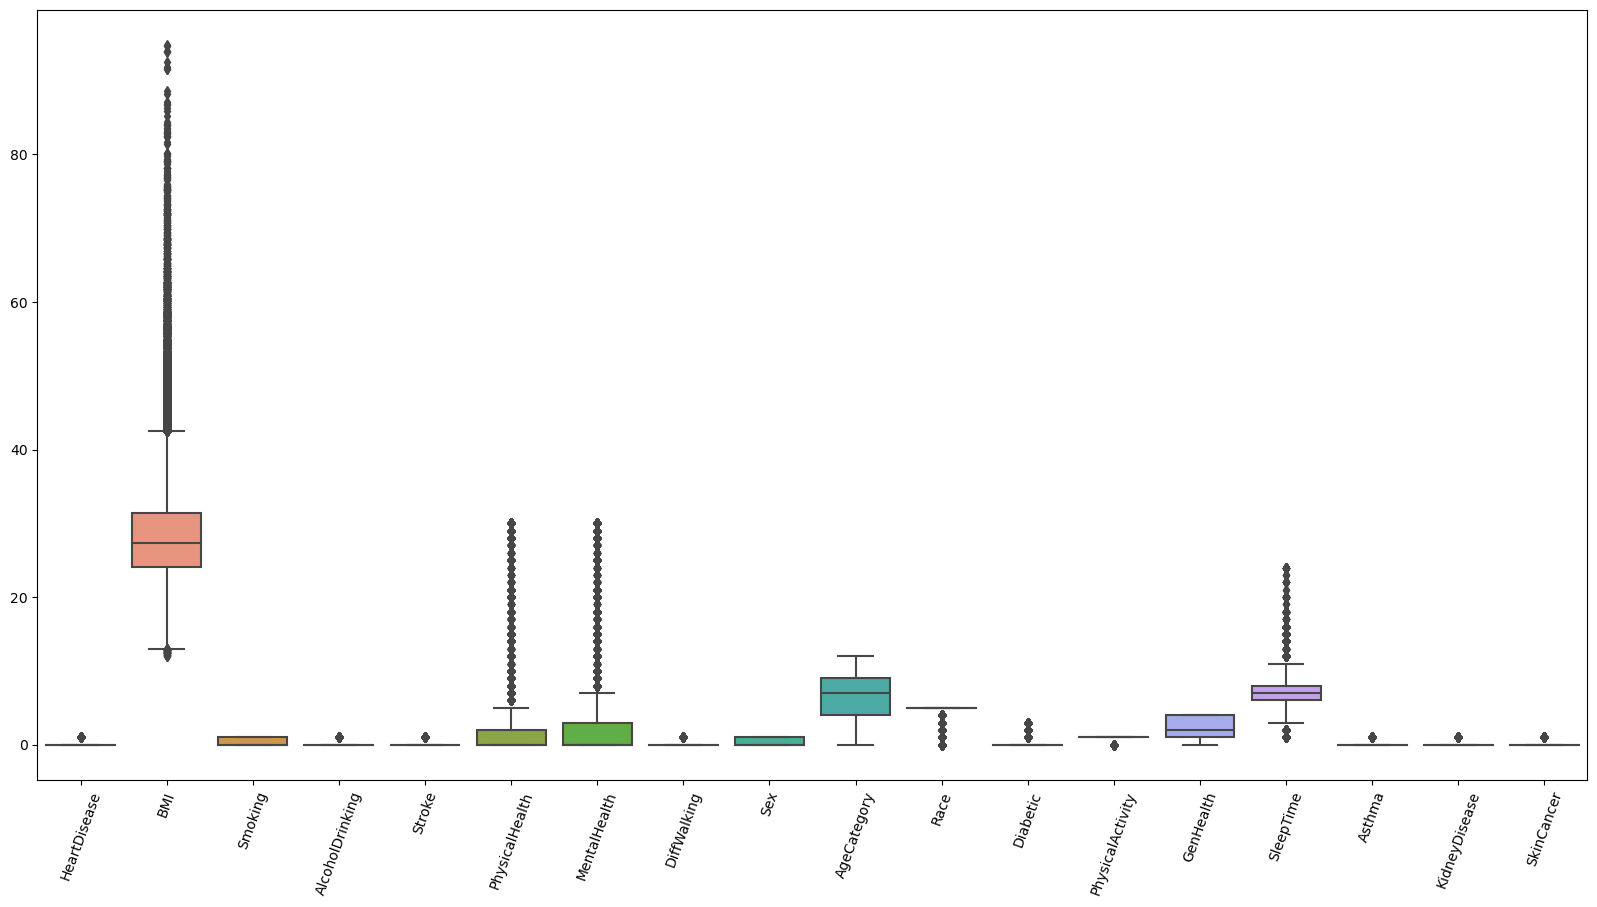

In [103]:
plt.figure(figsize=(20,10))
sns.boxplot(data=heart)
plt.xticks(rotation = 70)
plt.show()

# for BMI

In [104]:
heart.BMI.describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

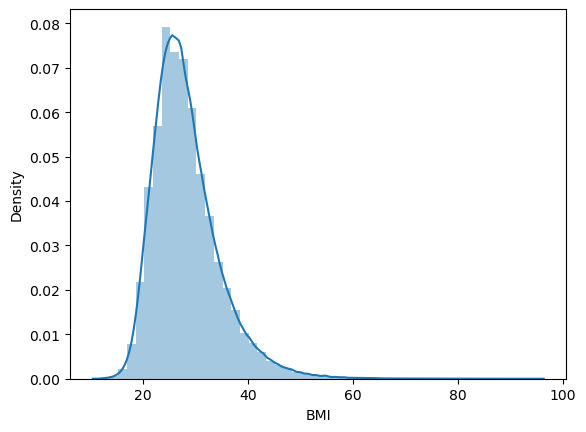

In [105]:
sns.distplot(heart.BMI)

<AxesSubplot:>

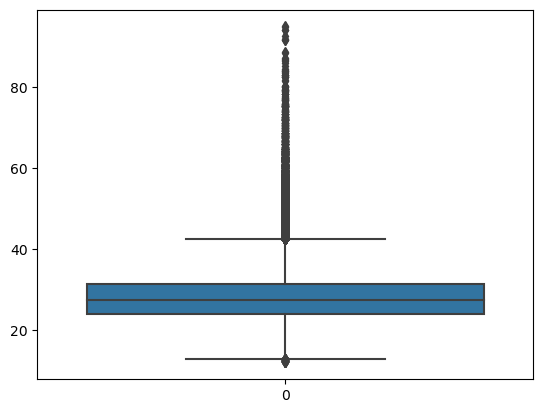

In [106]:
sns.boxplot(data=heart.BMI)

<AxesSubplot:>

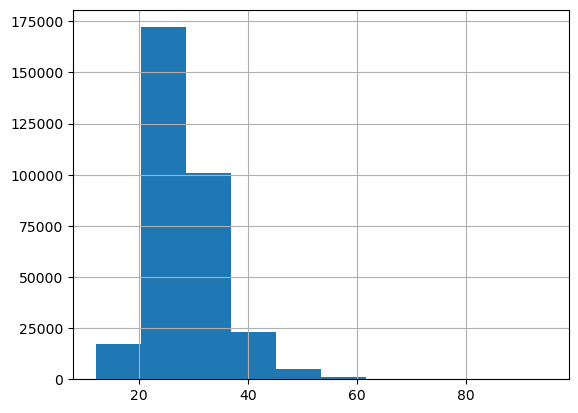

In [107]:
heart.BMI.hist()

In [108]:
Q1_BMI=heart.BMI.quantile(0.25)
Q3_BMI=heart.BMI.quantile(0.75)
IQR_BMI=Q3_BMI-Q1_BMI
LL_BMI=Q1_BMI-(3*IQR_BMI)
UL_BMI=Q3_BMI+(3*IQR_BMI)

heart[(heart.BMI<LL_BMI) | (heart.BMI>UL_BMI)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
105,0,58.54,0,0,0,30.0,0.0,1,1,9,4,1,1,3,3.0,1,0,0
504,0,54.87,0,0,0,15.0,15.0,1,0,10,5,0,0,3,4.0,0,0,1
551,0,55.98,0,0,0,15.0,0.0,1,0,12,5,2,0,1,7.0,1,0,1
561,0,75.82,0,0,0,0.0,0.0,0,0,6,5,0,1,2,8.0,1,1,0
686,1,55.85,0,0,0,30.0,0.0,0,1,8,5,2,0,1,6.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318514,0,54.68,1,0,0,0.0,0.0,1,0,4,3,0,1,0,8.0,1,0,0
318792,0,60.19,0,0,0,0.0,0.0,1,0,9,3,0,1,1,5.0,1,0,0
319019,0,58.53,0,0,0,0.0,30.0,0,0,2,3,0,0,2,6.0,0,0,0
319292,0,58.36,0,0,0,30.0,0.0,1,0,9,3,0,0,1,8.0,0,0,0


In [109]:
heart.loc[heart.BMI>UL_BMI,'BMI']=UL_BMI
heart.loc[heart.BMI<LL_BMI,'BMI']=LL_BMI

# Physical health

In [110]:
heart.PhysicalHealth.describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

<AxesSubplot:>

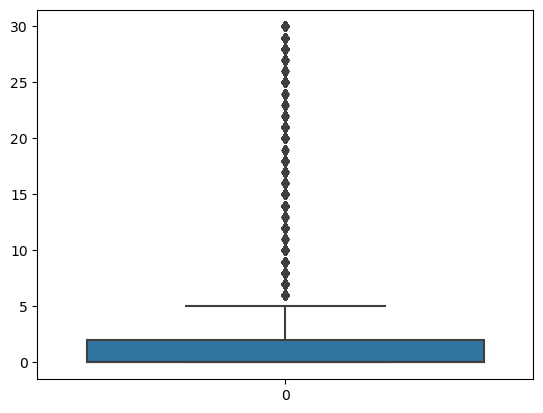

In [111]:
sns.boxplot(data=heart.PhysicalHealth)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

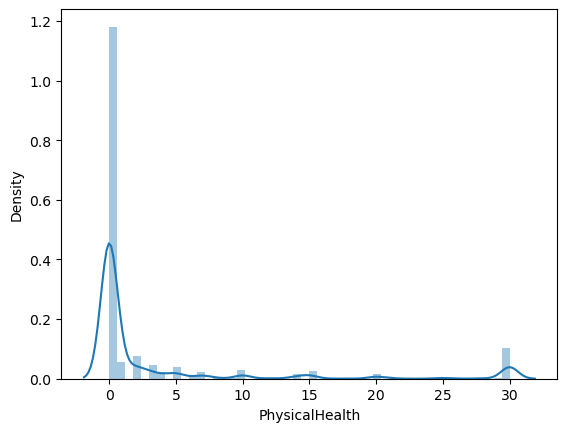

In [112]:
sns.distplot(heart.PhysicalHealth)

<AxesSubplot:>

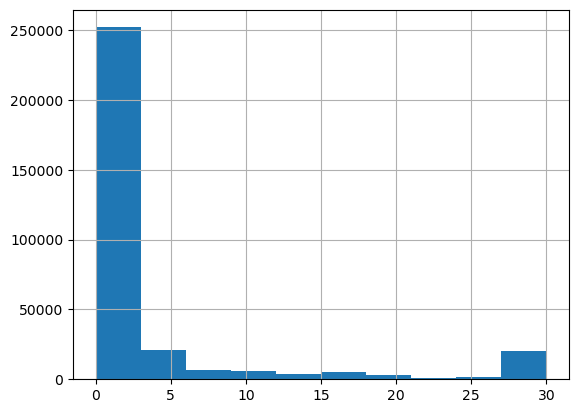

In [113]:
heart.PhysicalHealth.hist()

# For Mental Health

In [114]:
heart.MentalHealth.describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

<AxesSubplot:>

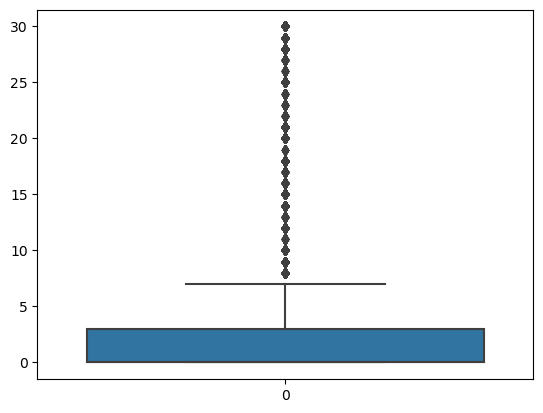

In [115]:
sns.boxplot(data=heart.MentalHealth)

<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

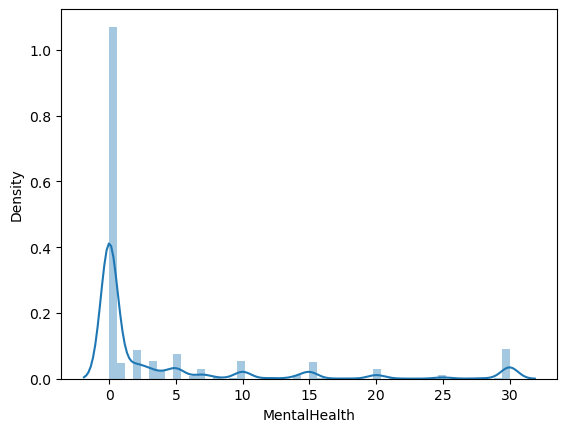

In [116]:
sns.distplot(heart.MentalHealth)

<AxesSubplot:>

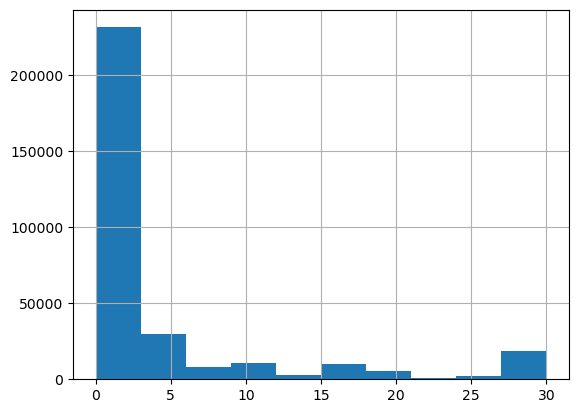

In [117]:
heart.MentalHealth.hist()

# SleepTime

In [118]:
heart.SleepTime.describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

<AxesSubplot:>

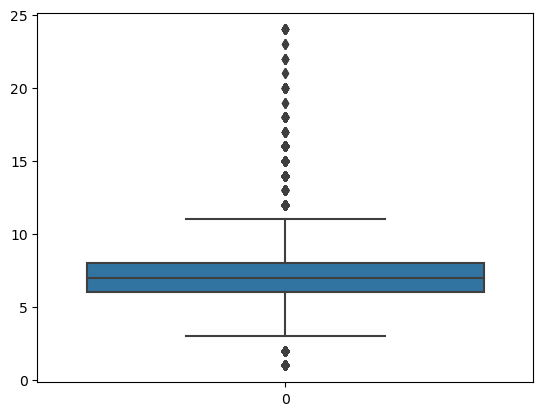

In [119]:
sns.boxplot(data=heart.SleepTime)

<AxesSubplot:xlabel='SleepTime', ylabel='Count'>

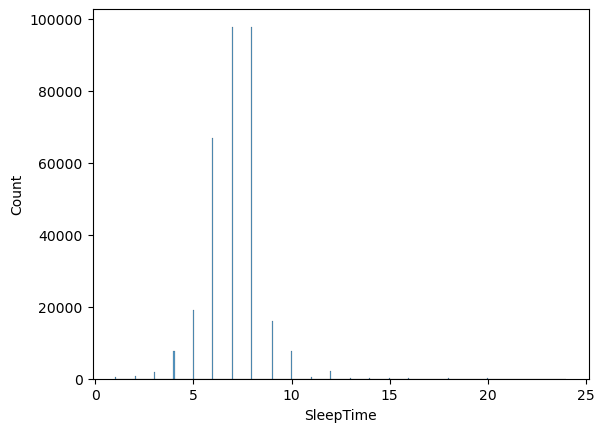

In [120]:
sns.histplot(heart.SleepTime)

<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

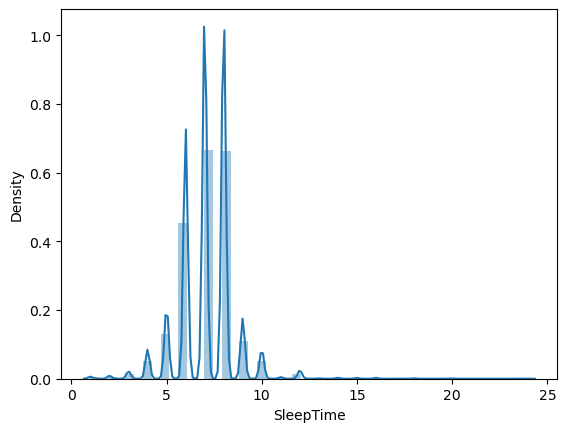

In [121]:
sns.distplot(heart.SleepTime)

<AxesSubplot:>

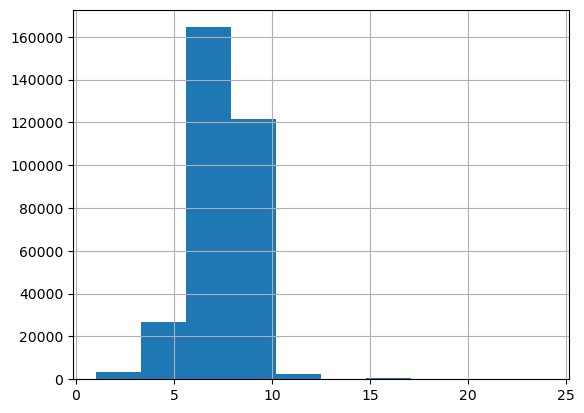

In [122]:
heart.SleepTime.hist()

In [123]:
Q1_SleepTime=heart.SleepTime.quantile(0.25)
Q3_SleepTime=heart.SleepTime.quantile(0.75)
IQR_SleepTime=Q3_SleepTime-Q1_SleepTime
LL_SleepTime=Q1_SleepTime-(3*IQR_SleepTime)
UL_SleepTime=Q3_SleepTime+(3*IQR_SleepTime)

heart[(heart.SleepTime<LL_SleepTime) | (heart.SleepTime>UL_SleepTime)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
10,1,34.30,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0
262,0,32.78,0,0,0,0.0,0.0,0,1,10,2,0,0,4,15.0,0,0,0
618,0,46.68,0,0,0,30.0,15.0,1,0,7,2,0,1,2,16.0,0,0,0
718,0,19.79,1,0,1,30.0,10.0,1,0,8,2,0,0,3,18.0,1,0,0
733,0,30.51,0,0,0,5.0,0.0,0,0,8,2,2,1,2,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314478,0,23.78,1,0,0,0.0,1.0,0,0,6,4,0,0,2,16.0,0,0,0
314642,0,30.09,0,0,0,30.0,30.0,1,0,6,4,0,0,1,15.0,1,0,0
315653,0,27.91,0,0,0,3.0,5.0,0,1,4,3,0,1,2,15.0,1,0,0
315663,1,31.09,0,0,1,0.0,0.0,1,0,12,3,2,0,2,15.0,1,0,0


In [124]:
heart.loc[heart.SleepTime>UL_SleepTime,'SleepTime']=UL_SleepTime
heart.loc[heart.SleepTime<LL_SleepTime,'SleepTime']=LL_SleepTime

# Data Transformation

# For BMI

In [125]:
# Check zero values present or not
heart_class[heart_class['BMI']==0]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


<AxesSubplot:xlabel='BMI', ylabel='Density'>

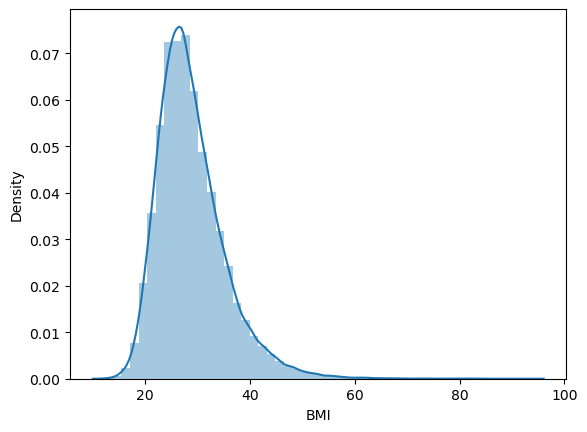

In [126]:
sns.distplot(heart_class.BMI)

In [127]:
heart_class.BMI.skew()

1.2695552031261135

In [128]:
heart_class.BMI = np.sqrt(heart_class.BMI)
heart_class.BMI.skew()

0.7939851415347887

<AxesSubplot:xlabel='BMI', ylabel='Density'>

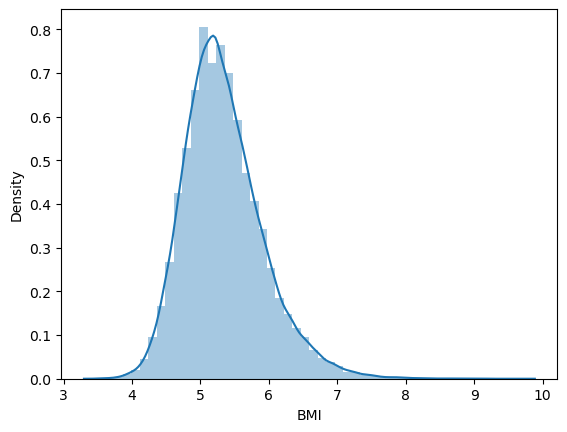

In [129]:
sns.distplot(heart_class.BMI)

# For SleepTime

In [130]:
# Check zero values present or not
heart_class[heart_class['SleepTime']==0]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer


<AxesSubplot:xlabel='SleepTime', ylabel='Density'>

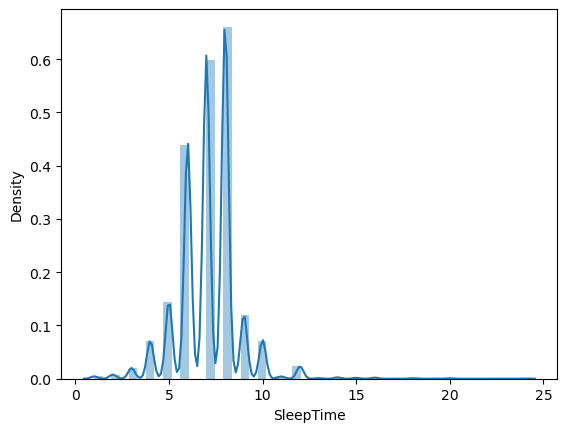

In [131]:
sns.distplot(heart_class.SleepTime)

In [132]:
heart_class.SleepTime.skew()

0.844555186790223

In [133]:
heart_class.skew()

HeartDisease        0.000000
BMI                 0.793985
Smoking             0.035516
AlcoholDrinking     3.837513
Stroke              2.782943
PhysicalHealth      1.764709
MentalHealth        2.159714
DiffWalking         1.201506
Sex                -0.118649
AgeCategory        -0.697264
Race               -2.153936
Diabetic            1.271426
PhysicalActivity   -0.933492
GenHealth          -0.023060
SleepTime           0.844555
Asthma              1.905790
KidneyDisease       3.166481
SkinCancer          2.139889
dtype: float64

# Split Data After Class Imblance

In [134]:
heart_class.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
213476,0,5.736724,1,0,0,0.0,0.0,0,1,6,5,0,1,2,6.0,0,0,0
113939,0,4.706379,0,0,0,0.0,0.0,0,1,12,5,0,1,2,8.0,0,0,1
38613,0,6.889848,0,0,0,7.0,0.0,0,1,1,5,0,0,2,8.0,0,0,0
199622,0,5.396295,0,0,0,0.0,0.0,0,0,5,5,0,1,4,6.0,0,0,0
267480,0,4.827007,0,0,0,0.0,0.0,0,0,0,3,0,0,2,7.0,0,0,0


In [135]:
X_af_Out = heart_class.drop(['HeartDisease'], axis=1)
y_af_Out = heart_class['HeartDisease']

In [136]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_af_Out, y_af_Out, test_size= 0.2, random_state=101)
X_train_out.shape, X_test_out.shape, y_train_out.shape, y_test_out.shape

((43796, 17), (10950, 17), (43796,), (10950,))

# Feature selection

In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply select k_best algorithm

In [138]:
cst=SelectKBest(score_func=chi2,k="all")
cst_fit=cst.fit(X_af_Out, y_af_Out)

In [139]:
cst_score=cst_fit.scores_
cst_score

array([2.84103654e+01, 1.00066832e+03, 2.15388512e+02, 2.56534286e+03,
       6.05269518e+04, 1.91991295e+03, 3.46123680e+03, 3.71961647e+02,
       1.57312095e+04, 6.39276990e+01, 5.17477340e+03, 4.05052221e+02,
       2.05726274e+01, 3.01054947e+00, 2.23012485e+02, 1.69796690e+03,
       9.06064407e+02])

In [140]:
feat=pd.DataFrame({"columns":list(X_af_Out), "Score":list(cst_score)})
feat.nlargest(17, 'Score')

,columns,Score
4,PhysicalHealth,60526.951806
8,AgeCategory,15731.209511
10,Diabetic,5174.773396
6,DiffWalking,3461.236800
3,Stroke,2565.342857
5,MentalHealth,1919.912954
15,KidneyDisease,1697.966903
1,Smoking,1000.668316
16,SkinCancer,906.064407
11,PhysicalActivity,405.052221


# All features are important so we can not drop any of them

# Implementation OF Machine Learning Algorithm after EDA

# 1. Logistic Regression

In [141]:
log_out = LogisticRegression()
log_out.fit(X_train_out, y_train_out)

LogisticRegression()

In [142]:
log_out_pred = log_out.predict(X_test_out)
log_out_pred

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
log_out_accuraccy = log_out.score(X_test_out, y_test_out)*100
log_out_accuraccy

75.12328767123287

In [144]:
print(confusion_matrix(y_test_out,log_out_pred))

[[4089 1412]
 [1312 4137]]


In [145]:
print(classification_report(y_test_out,log_out_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5501
           1       0.75      0.76      0.75      5449

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950



# 2. Decision Tree

In [146]:
dt_out = DecisionTreeClassifier()
dt_out.fit(X_train_out,y_train_out)

DecisionTreeClassifier()

In [147]:
dt_pred_out = dt_out.predict(X_test_out)
dt_pred_out

array([0, 0, 0, ..., 1, 0, 0])

In [148]:
dt_out_accuraccy = dt_out.score(X_test_out, y_test_out)*100
dt_out_accuraccy

67.6164383561644

In [149]:
print(confusion_matrix(y_test_out,dt_pred_out))

[[3776 1725]
 [1821 3628]]


In [150]:
print(classification_report(y_test_out, dt_pred_out))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      5501
           1       0.68      0.67      0.67      5449

    accuracy                           0.68     10950
   macro avg       0.68      0.68      0.68     10950
weighted avg       0.68      0.68      0.68     10950



# 3. Random Forest

In [151]:
rf_out = RandomForestClassifier()
rf_out.fit(X_train_out,y_train_out)

RandomForestClassifier()

In [152]:
rf_pred_out = rf_out.predict(X_test_out)
rf_pred_out

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
rf_out_accuraccy = rf_out.score(X_test_out, y_test_out)*100
rf_out_accuraccy

74.6392694063927

In [154]:
print(confusion_matrix(y_test_out, rf_pred_out))

[[3975 1526]
 [1251 4198]]


In [155]:
print(classification_report(y_test_out, rf_pred_out))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      5501
           1       0.73      0.77      0.75      5449

    accuracy                           0.75     10950
   macro avg       0.75      0.75      0.75     10950
weighted avg       0.75      0.75      0.75     10950



# 4. Naive Bayes

In [156]:
nb_out = MultinomialNB()
nb_out.fit(X_train_out,y_train_out)

MultinomialNB()

In [157]:
nb_pred_out = nb_out.predict(X_test_out)
nb_pred_out

array([1, 0, 0, ..., 0, 0, 1])

In [158]:
nb_out_accuraccy = nb_out.score(X_test_out,y_test_out)*100
nb_out_accuraccy

62.68493150684932

In [159]:
print(confusion_matrix(y_test_out, nb_pred_out))

[[4706  795]
 [3291 2158]]


In [160]:
print(classification_report(y_test_out, nb_pred_out))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70      5501
           1       0.73      0.40      0.51      5449

    accuracy                           0.63     10950
   macro avg       0.66      0.63      0.61     10950
weighted avg       0.66      0.63      0.61     10950



# 5. Ada Boost

In [161]:
ada_out = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=2)
ada_out.fit(X_train_out, y_train_out)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [162]:
ada_pred_out = ada_out.predict(X_test_out)
ada_pred_out

array([0, 0, 0, ..., 1, 0, 0])

In [163]:
ada_out_accuraccy = ada_out.score(X_test_out, y_test_out)*100
ada_out_accuraccy

66.22831050228311

In [164]:
print(confusion_matrix(y_test_out, ada_pred_out))

[[4294 1207]
 [2491 2958]]


In [165]:
print(classification_report(y_test_out, ada_pred_out))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70      5501
           1       0.71      0.54      0.62      5449

    accuracy                           0.66     10950
   macro avg       0.67      0.66      0.66     10950
weighted avg       0.67      0.66      0.66     10950



# 6. XG Boost

In [166]:
xgb_out=XGBClassifier()
xgb_out.fit(X_train_out, y_train_out)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [167]:
xgb_pred_out = xgb_out.predict(X_test_out)
xgb_pred_out

array([0, 0, 0, ..., 0, 0, 1])

In [168]:
xgb_out_accuraccy = xgb_out.score(X_test_out, y_test_out)*100
xgb_out_accuraccy

76.38356164383562

In [169]:
print(confusion_matrix(y_test_out, xgb_pred_out))

[[4037 1464]
 [1122 4327]]


In [170]:
print(classification_report(y_test_out, xgb_pred_out))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      5501
           1       0.75      0.79      0.77      5449

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950



# 7. SVM

In [171]:
svms_out = SVC()
svms_out.fit(X_train_out, y_train_out)

SVC()

In [172]:
svms_pred_out = svms_out.predict(X_test_out)
svms_pred_out

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
svms_out_accuraccy = svms_out.score(X_test_out, y_test_out)*100
svms_out_accuraccy

75.47945205479452

In [174]:
print(confusion_matrix(y_test_out, svms_pred_out))

[[3917 1584]
 [1101 4348]]


In [175]:
print(classification_report(y_test_out, svms_pred_out))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5501
           1       0.73      0.80      0.76      5449

    accuracy                           0.75     10950
   macro avg       0.76      0.75      0.75     10950
weighted avg       0.76      0.75      0.75     10950



# 8. KNN

In [176]:
knn_out = KNeighborsClassifier()
knn_out.fit(X_train_out, y_train_out)

KNeighborsClassifier()

In [177]:
knn_pred_out = knn_out.predict(X_test_out)
knn_pred_out

array([0, 0, 0, ..., 1, 0, 0])

In [178]:
knn_out_accuraccy = knn_out.score(X_test_out, y_test_out)*100
knn_out_accuraccy

72.35616438356163

In [179]:
print(confusion_matrix(y_test_out, knn_pred_out))

[[3966 1535]
 [1492 3957]]


In [180]:
print(classification_report(y_test_out, knn_pred_out))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5501
           1       0.72      0.73      0.72      5449

    accuracy                           0.72     10950
   macro avg       0.72      0.72      0.72     10950
weighted avg       0.72      0.72      0.72     10950



# Conclusion

In [181]:
#list_out_1 = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Ada Boost','XG Boost','SVM','KNN']
#list_out_2 = [log_out_accuraccy, dt_out_accuraccy,rf_out_accuraccy, nb_out_accuraccy, ada_out_accuraccy, xgb_out_accuraccy, svms_out_accuraccy, knn_out_accuraccy]
#df1 = pd.DataFrame({'Model Name':list_out_1, 'Accuraccy':list_out_2})
#df1

In [182]:
#df

# If we concider accuracy then "XG Boost" and "Logistic Regression" both have same accuraccy. The classification report of XG Boost is Quite better than Logistic regression. So XG Boost is the best Fitted Model.